In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, solve_ivp

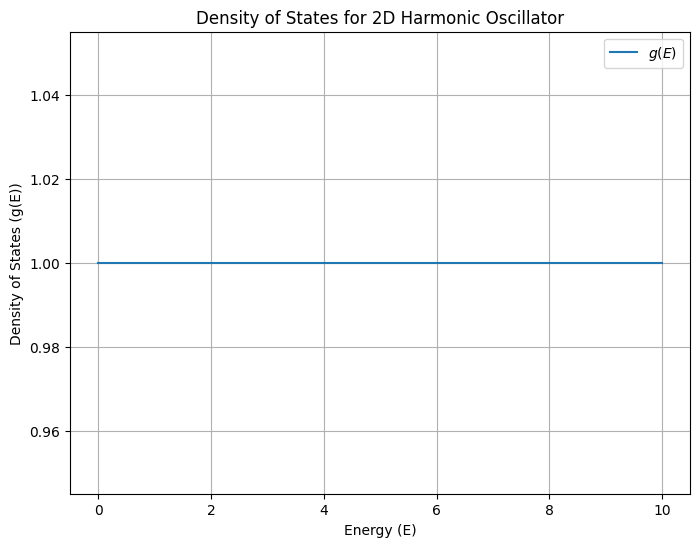

Partition Function Z(beta) = 1.0000000000000002


In [9]:
# Constants
m = 1.0  # Mass
omega = 1.0  # Oscillator frequency
hbar = 1.0  # Reduced Planck's constant
beta = 1.0  # Inverse temperature (1/k_B T)

# Density of states for 2D harmonic oscillator
def density_of_states(E):
    return 1 / (hbar * omega)**2  # Constant density of states

# Partition function using density of states
def partition_function(beta):
    integrand = lambda E: density_of_states(E) * np.exp(-beta * E)
    result, _ = quad(integrand, 0, np.inf)
    return result

# Plot density of states
E_values = np.linspace(0, 10, 100)
g_E_values = [density_of_states(E) for E in E_values]

plt.figure(figsize=(8, 6))
plt.plot(E_values, g_E_values, label=r'$g(E)$')
plt.xlabel('Energy (E)')
plt.ylabel('Density of States (g(E))')
plt.title('Density of States for 2D Harmonic Oscillator')
plt.legend()
plt.grid()
plt.show()

# Calculate and print partition function
Z = partition_function(beta)
print(f"Partition Function Z(beta) = {Z}")

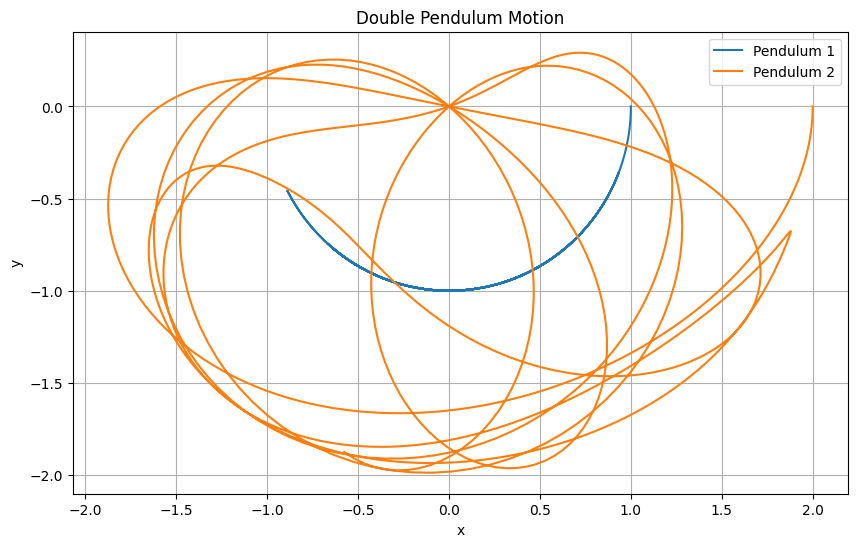

In [10]:
# Constants
g = 9.81  # Gravitational acceleration
L1, L2 = 1.0, 1.0  # Lengths of the pendulums
m1, m2 = 1.0, 1.0  # Masses of the pendulums

# Initial conditions: [theta1, omega1, theta2, omega2]
initial_conditions = [np.pi / 2, 0, np.pi / 2, 0]

# Time span for simulation
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Equations of motion for the double pendulum
def double_pendulum(t, y):
    theta1, omega1, theta2, omega2 = y
    delta_theta = theta2 - theta1

    # Equations of motion
    dtheta1_dt = omega1
    dtheta2_dt = omega2

    # Angular accelerations
    denominator = m1 + m2 * np.sin(delta_theta)**2
    domega1_dt = (m2 * g * np.sin(theta2) * np.cos(delta_theta) - (m1 + m2) * g * np.sin(theta1))
    domega1_dt /= L1 * denominator

    domega2_dt = (m1 + m2) * (g * np.sin(theta1) * np.cos(delta_theta) - g * np.sin(theta2))
    domega2_dt /= L2 * denominator

    return [dtheta1_dt, domega1_dt, dtheta2_dt, domega2_dt]

# Solve the ODE
solution = solve_ivp(double_pendulum, t_span, initial_conditions, t_eval=t_eval)

# Extract results
theta1, omega1, theta2, omega2 = solution.y

# Convert to Cartesian coordinates
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

# Plot the double pendulum motion
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='Pendulum 1')
plt.plot(x2, y2, label='Pendulum 2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Double Pendulum Motion')
plt.legend()
plt.grid()
plt.show()


\section*{Task 1: Fermi-Dirac Statistics (Week 5B)}

In this task, we are asked to derive the \textbf{partition function} for a system of fermions under the \textbf{grand canonical ensemble}. Fermions are particles that obey the \textbf{Pauli exclusion principle}, meaning no two identical fermions can occupy the same quantum state simultaneously.

\subsection*{Step 1: Grand Canonical Partition Function}

The grand canonical partition function \( \mathcal{Z} \) for a system of fermions is given by:

\[
\mathcal{Z} = \sum_{\{n_i\}} e^{-\beta (E - \mu N)},
\]

where:
\begin{itemize}
    \item \( \{n_i\} \) represents the set of occupation numbers for each energy level,
    \item \( E = \sum_i n_i \epsilon_i \) is the total energy of the system,
    \item \( N = \sum_i n_i \) is the total number of particles,
    \item \( \beta = \frac{1}{k_B T} \) is the inverse temperature,
    \item \( \mu \) is the chemical potential,
    \item \( \epsilon_i \) is the energy of the \(i\)-th level.
\end{itemize}

For fermions, the occupation number \( n_i \) can only be 0 or 1 due to the Pauli exclusion principle. Therefore, the partition function can be written as a product over all energy levels:

\[
\mathcal{Z} = \prod_i \sum_{n_i=0}^1 e^{-\beta (\epsilon_i - \mu) n_i}.
\]

\subsection*{Step 2: Simplify the Partition Function}

For each energy level \( \epsilon_i \), the sum over \( n_i \) (which can only be 0 or 1) is:

\[
\sum_{n_i=0}^1 e^{-\beta (\epsilon_i - \mu) n_i} = 1 + e^{-\beta (\epsilon_i - \mu)}.
\]

Thus, the grand canonical partition function becomes:

\[
\mathcal{Z} = \prod_i \left(1 + e^{-\beta (\epsilon_i - \mu)}\right).
\]

\subsection*{Step 3: Logarithm of the Partition Function}

Taking the natural logarithm of \( \mathcal{Z} \), we get:

\[
\ln \mathcal{Z} = \sum_i \ln \left(1 + e^{-\beta (\epsilon_i - \mu)}\right).
\]

This expression is useful for calculating thermodynamic quantities such as the average number of particles and the average energy.

\subsection*{Step 4: Average Number of Particles}

The average number of particles \( \langle N \rangle \) is given by:

\[
\langle N \rangle = k_B T \frac{\partial \ln \mathcal{Z}}{\partial \mu}.
\]

Substituting \( \ln \mathcal{Z} \), we get:

\[
\langle N \rangle = k_B T \frac{\partial}{\partial \mu} \left[ \sum_i \ln \left(1 + e^{-\beta (\epsilon_i - \mu)}\right) \right].
\]

Differentiating term by term, we find:

\[
\langle N \rangle = \sum_i \frac{1}{e^{\beta (\epsilon_i - \mu)} + 1}.
\]

This is the \textbf{Fermi-Dirac distribution}, which gives the average occupation number of each energy level \( \epsilon_i \):

\[
\langle n_i \rangle = \frac{1}{e^{\beta (\epsilon_i - \mu)} + 1}.
\]

\subsection*{Step 5: Partition Function for a 2-Level System}

For a 2-level system with energies \( 0 \) and \( \epsilon \), the grand canonical partition function is:

\[
\mathcal{Z} = \left(1 + e^{-\beta (0 - \mu)}\right) \left(1 + e^{-\beta (\epsilon - \mu)}\right).
\]

Simplifying, we get:

\[
\mathcal{Z} = \left(1 + e^{\beta \mu}\right) \left(1 + e^{-\beta (\epsilon - \mu)}\right).
\]

\subsection*{Final Result}

The grand canonical partition function for a system of fermions in a 2-level system is:

\[
\boxed{
\mathcal{Z} = \left(1 + e^{\beta \mu}\right) \left(1 + e^{-\beta (\epsilon - \mu)}\right)
}
\]

\subsection*{Summary of Key Equations}
\begin{enumerate}
    \item \textbf{Grand Canonical Partition Function}:
    \[
    \mathcal{Z} = \prod_i \left(1 + e^{-\beta (\epsilon_i - \mu)}\right).
    \]

    \item \textbf{Fermi-Dirac Distribution}:
    \[
    \langle n_i \rangle = \frac{1}{e^{\beta (\epsilon_i - \mu)} + 1}.
    \]

    \item \textbf{Average Number of Particles}:
    \[
    \langle N \rangle = \sum_i \frac{1}{e^{\beta (\epsilon_i - \mu)} + 1}.
    \]

    \item \textbf{Partition Function for 2-Level System}:
    \[
    \mathcal{Z} = \left(1 + e^{\beta \mu}\right) \left(1 + e^{-\beta (\epsilon - \mu)}\right).
    \]
\end{enumerate}

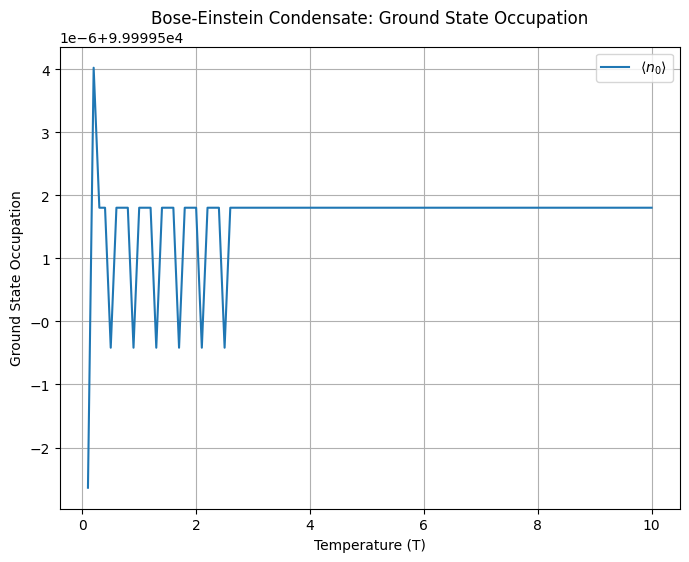

In [11]:
# Constants
N = 1e5  # Number of bosons
kB = 1.0  # Boltzmann constant
epsilon = 1.0  # Energy level spacing

# Temperature range
T_values = np.linspace(0.1, 10, 100)

# Ground state occupation for BEC
def ground_state_occupation(T, mu):
    return 1 / (np.exp((epsilon - mu) / (kB * T)) - 1)

# Chemical potential (approximation for BEC)
def chemical_potential(T):
    return epsilon - kB * T / N

# Calculate ground state occupation
mu_values = [chemical_potential(T) for T in T_values]
n0_values = [ground_state_occupation(T, mu) for T, mu in zip(T_values, mu_values)]

# Plot ground state occupation
plt.figure(figsize=(8, 6))
plt.plot(T_values, n0_values, label=r'$\langle n_0 \rangle$')
plt.xlabel('Temperature (T)')
plt.ylabel('Ground State Occupation')
plt.title('Bose-Einstein Condensate: Ground State Occupation')
plt.legend()
plt.grid()
plt.show()